## <font color = green>Problem Statement:

<font color = purple>Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of 
gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified 
as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 
This latter class was combined with the poisonous one. The Guide clearly states that 
there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three,
let it be'' for Poisonous Oak and Ivy.

### <font color=green>Importing requried libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from category_encoders import BinaryEncoder
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### <font color = green>Display Maximum columns and rows

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

### <font color=green>Reading Data

In [3]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
# Here we use shape command to know total no of rows and columns present in our dataset.

print('Rows and Columns in Dataset : ', df.shape )

Rows and Columns in Dataset :  (8124, 23)


In [5]:
# Here we use info command to know all details about dataset i.e, size, type etc.
print('---------------------------------------------------------------------------')
print('\nInformations of dataset :-\n')
print(df.info())
print('\n---------------------------------------------------------------------------')

---------------------------------------------------------------------------

Informations of dataset :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8

#### <font color=purple> Our dataset set has all object value we need to apply encoding technique.

In [6]:
# Here we use isna() command to identify of nan in our dataset.
print('---------------------------------------------------------------------------')
print('\nNaN in dataset :-\n')
print(df.isna().sum())
print('\n---------------------------------------------------------------------------\n')

---------------------------------------------------------------------------

NaN in dataset :-

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

---------------------------------------------------------------------------



__<font color=purple>There is no null values in dataset.__

### <font color=green>Checking class imbalence

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### <font color=purple>Dataset is balance.

### <font color=green>Label Encoder

In [8]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(df['class'])
y

array([1, 0, 0, ..., 0, 1, 0])

### <font color=green>Binary Encoder

In [9]:
bi_enc = BinaryEncoder()
x = bi_enc.fit_transform(df)
x.head()


,class_0,class_1,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,cap-color_3,cap-color_4,bruises_0,bruises_1,odor_0,odor_1,odor_2,odor_3,odor_4,gill-attachment_0,gill-attachment_1,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,gill-color_0,gill-color_1,gill-color_2,gill-color_3,gill-color_4,stalk-shape_0,stalk-shape_1,stalk-root_0,stalk-root_1,stalk-root_2,stalk-root_3,stalk-surface-above-ring_0,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-below-ring_0,stalk-surface-below-ring_1,stalk-surface-below-ring_2,stalk-color-above-ring_0,stalk-color-above-ring_1,stalk-color-above-ring_2,stalk-color-above-ring_3,stalk-color-above-ring_4,stalk-color-below-ring_0,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,veil-type_0,veil-color_0,veil-color_1,veil-color_2,ring-number_0,ring-number_1,ring-number_2,ring-type_0,ring-type_1,ring-type_2,ring-type_3,spore-print-color_0,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,population_0,population_1,population_2,population_3,habitat_0,habitat_1,habitat_2,habitat_3
0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
3,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0


#### <font color=purple>Above we encode our categorical data into binary.

In [10]:
# Here we use shape command to know total no of rows and columns present in our dataset.

print('Rows and Columns in Dataset : ', x.shape )

Rows and Columns in Dataset :  (8124, 78)


### <font color = green >Drop repeated class

In [11]:
x = x.drop(columns = ['class_0', 'class_1'], axis = 1)
x.head()

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,cap-color_3,cap-color_4,bruises_0,bruises_1,odor_0,odor_1,odor_2,odor_3,odor_4,gill-attachment_0,gill-attachment_1,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,gill-color_0,gill-color_1,gill-color_2,gill-color_3,gill-color_4,stalk-shape_0,stalk-shape_1,stalk-root_0,stalk-root_1,stalk-root_2,stalk-root_3,stalk-surface-above-ring_0,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-below-ring_0,stalk-surface-below-ring_1,stalk-surface-below-ring_2,stalk-color-above-ring_0,stalk-color-above-ring_1,stalk-color-above-ring_2,stalk-color-above-ring_3,stalk-color-above-ring_4,stalk-color-below-ring_0,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,veil-type_0,veil-color_0,veil-color_1,veil-color_2,ring-number_0,ring-number_1,ring-number_2,ring-type_0,ring-type_1,ring-type_2,ring-type_3,spore-print-color_0,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,population_0,population_1,population_2,population_3,habitat_0,habitat_1,habitat_2,habitat_3
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0


### <font color = green>Checking for outliers

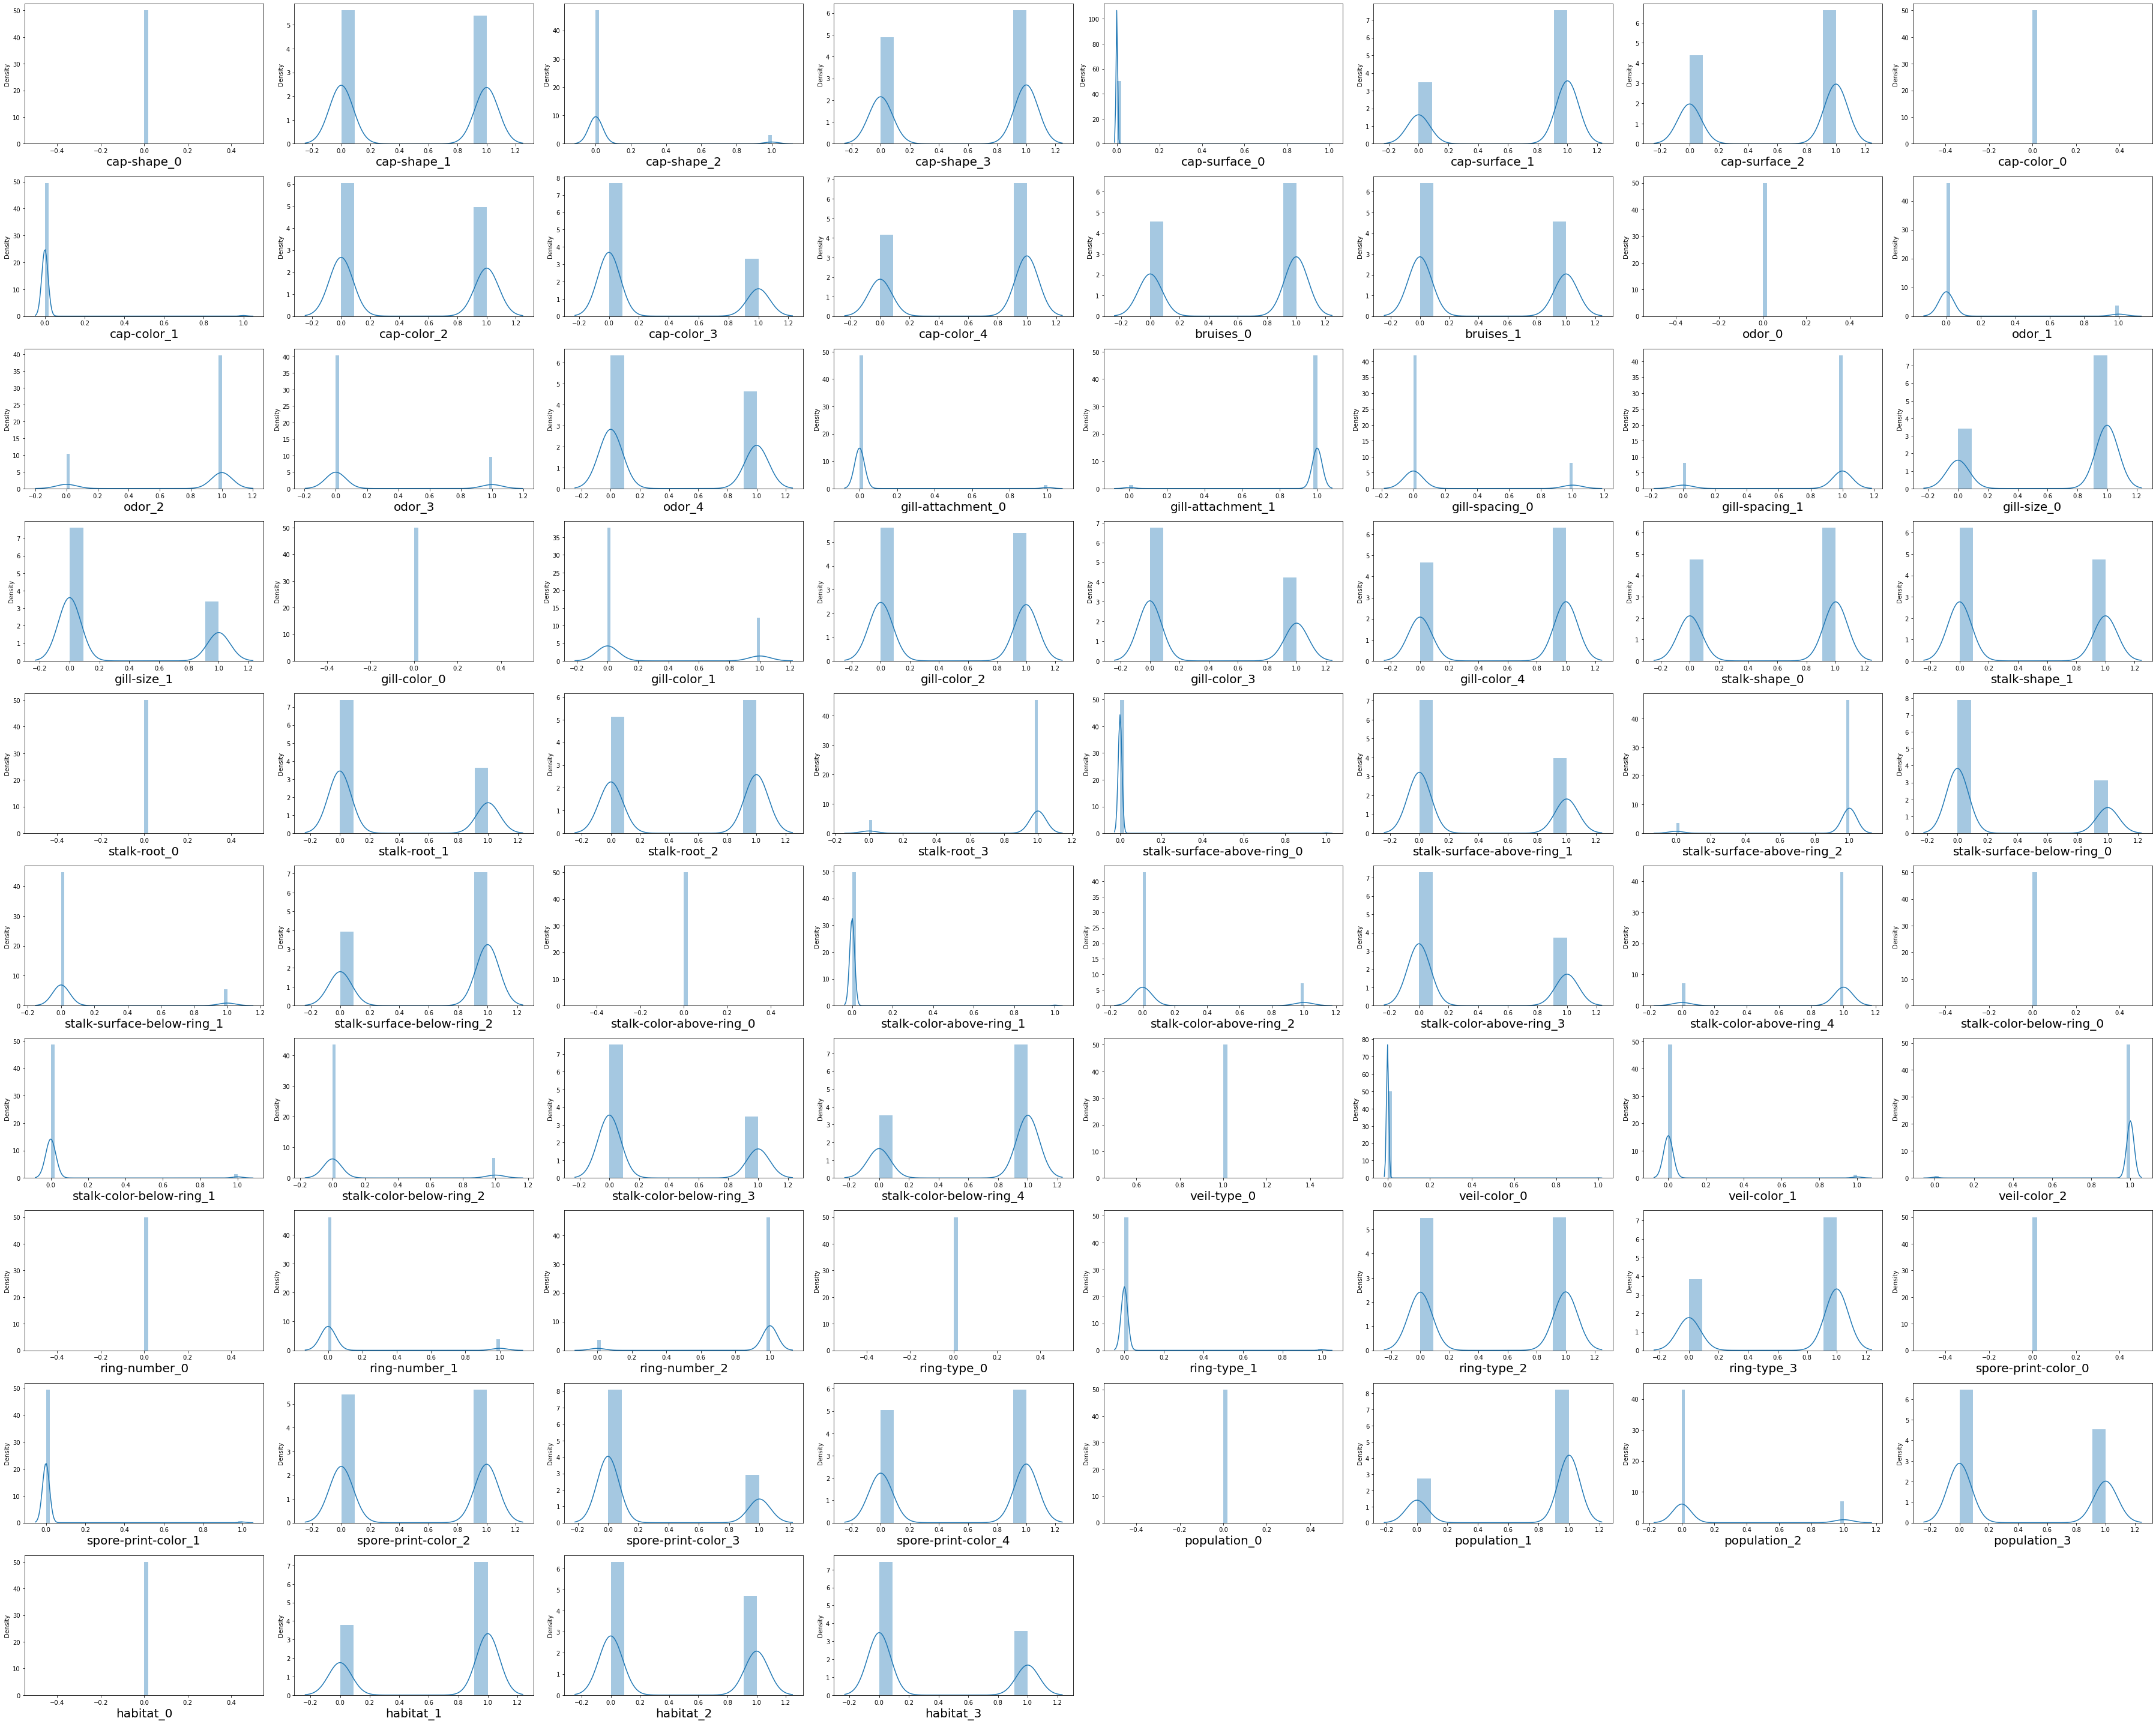

In [12]:
# Checking outlier
plt.figure(figsize = (50,40))
plotnumber = 1

for column in x:
    if plotnumber <=80:
        ax = plt.subplot(10,8, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### <font color = purple>There is no outliers.

### <font color = green> Split data into train and test. Model will be bulit on training data and tested on test data.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = green>Model Building.

### <font color = green>Logistic Regression model instantiaing, training and evaluating

In [14]:
Lr = LogisticRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [15]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[1056    2]
 [   3  970]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

------------------------------------------------------------


### <font color = purple>Conclusion : Logistic Regression model has 100% score .

### <font color = green> Cross Validation score to check if the model is overfitting 

In [16]:
cv = cross_val_score(Lr, x, y, cv = 5)
print('Cross Validation score of Logistic Regression model --->', cv.mean())

Cross Validation score of Logistic Regression model ---> 0.877243956043956


### <font color = purple>Conclusion : Logistic Regression model has 87% Cross Validation score .

### <font color = green>Decision Tree model instantiaing, training and evaluating

In [17]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [18]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[1058    0]
 [   0  973]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

------------------------------------------------------------


### <font color = purple>Conclusion : Decision Tree model has 100% score .

### <font color = green> Cross Validation score to check if the model is overfitting 

In [19]:
cv = cross_val_score(DT, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.9280909435392195


### <font color = purple>Conclusion : Decision Tree model has 93% Cross Validation score .

### <font color = green>Knn model instantiaing, training and evaluating

In [20]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [21]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[1058    0]
 [   0  973]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

------------------------------------------------------------


### <font color = purple>Conclusion : Knn model has 100% score .

### <font color = green> Cross Validation score to check if the model is overfitting 

In [22]:
cv = cross_val_score(Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.9308065176203109


### <font color = purple>Conclusion : Knn model has 93% Cross Validation score .

### <font color = green>Random Forest model instantiaing, training and evaluating

In [23]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [24]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[1058    0]
 [   0  973]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

------------------------------------------------------------


### <font color = purple>Conclusion : Random Forest model has 100% score .

### <font color = green> Cross Validation score to check if the model is overfitting 

In [25]:
cv = cross_val_score(Rn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.9209553618794999


### <font color = purple>Conclusion : Random Forest model has 90% Cross Validation score .

### <font color = green>SVM model instantiaing, training and evaluating

In [26]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [27]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[1058    0]
 [   0  973]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

------------------------------------------------------------


### <font color = purple>Conclusion : SVM model has 100% score .

### <font color = green> Cross Validation score to check if the model is overfitting 

In [28]:
cv = cross_val_score(svc, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.8893054945054946


### <font color = purple>Conclusion : SVM model has 88% Cross Validation score .

### <font color = green>Looking CV score we found Decision Tree has best model so we do Hyperparameter Tuning on it.

In [29]:
# we are tuning hyperparameter, we are passing the different values for both parameters
grid_param = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20, 3), 'min_samples_leaf': range(1, 50, 2), 'min_samples_split' : range(2, 50, 2)}

In [34]:
grid_search = GridSearchCV(estimator = DT, param_grid = grid_param, cv = 5 , n_jobs = -1)

In [35]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 50, 2),
                         'min_samples_split': range(2, 50, 2)})

In [36]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [38]:
hdt = DecisionTreeClassifier(criterion = 'gini', max_depth = 8 , min_samples_leaf = 1, min_samples_split = 2)
hdt.fit(x_train, y_train)
hdt.score(x_test, y_test)

1.0

In [39]:
y_pred = hdt.predict(x_test)

In [40]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[1058    0]
 [   0  973]]

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

------------------------------------------------------------


### <font color = purple>After Hyperparameter Tuning model accuracy score increase to 100% .

## <font color = green>Saving The Model

In [42]:
# saving the model to the Local file system
filename = 'hdt_model.pickle'
pickle.dump(hdt, open(filename, 'wb'))

## <font color = purple>Final Conclusion : Decision Tree is our best model.